# setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "thesis/collab notebooks and external code/source"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/drive/My Drive/thesis/collab notebooks and external code/source

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [3]:
!pip install xport

In [4]:
#NAIMAN'S ORIGINAL CODE
# create dictionary of data frames indexed by file names
#
import re
import os
import xport #
import pandas as pd
import numpy as np

L=os.listdir()
L=[x for x in L if re.search("_H.XPT",x)]
df={}
fnames=[]
for x in L:
    #print(x)
    with open(x,"rb") as fin:
        y=x.replace(".XPT","")
        dt=xport.to_dataframe(fin)
        if 'SEQN' in dt.columns:
            fnames.append(x.replace(".XPT",""))
            df[y]=dt
print(len(fnames))

17


#Creating LC comment files for CUSEZN_H (Copper, Selenium & Zinc - Serum) where everything is detect for everyone

In [5]:
df['CUSEZN_H'].head()

,SEQN,WTSA2YR,LBXSCU,LBDSCUSI,LBXSSE,LBDSSESI,LBXSZN,LBDSZNSI,URXUCR
0,73560.0,183653.604036,122.0,19.15,112.2,1.42,79.9,12.22,76.0
1,73564.0,194847.483347,128.0,20.10,131.2,1.67,81.0,12.39,242.0
2,73567.0,100284.090673,128.6,20.19,114.0,1.45,73.2,11.20,215.0
3,73583.0,163017.304491,NaN,NaN,NaN,NaN,NaN,NaN,151.0
4,73585.0,55880.049721,86.1,13.52,114.5,1.45,89.8,13.74,100.0


In [6]:
df['CUSEZN_H']['LBDSCULC']=0
df['CUSEZN_H']['LBDSSELC']=0
df['CUSEZN_H']['LBDSZNLC']=0
df['CUSEZN_H']['URDUCRLC']=0

#making a dictionary of all comment codes for detection. (0 means at or above detection limit, 1 means below)

# d_p_dropna = dictionary of detect percent, omitting the Nan values

In [7]:
#df['AMDGYD_H']
#print(fnames)
d_p = {}
d_p_dropna = {}
for name in fnames:
  # for each chemical , create df with only 'LC' cols
  n = df[name].loc[:,df[name].columns.str.endswith('LC')]
  # get percentage 
  for column in n:
    p = round(((n[column][n[column]==0].count())/len(n))*100,2)
    d_p[column] = p
    p_dropna = round(((n[column][n[column]==0].count())/len(n[column].dropna()))*100,2)
    d_p_dropna[column] = p_dropna


In [8]:
#removing what is not a comment code, but just ends with 'LC'
d_p.pop("URXTLC")
d_p_dropna.pop("URXTLC")

0.0

In [9]:
d_p_dropna

{'LBD2DFLC': 18.39,
 'LBD4CELC': 0.0,
 'LBDACRLC': 100.0,
 'LBDBCDLC': 71.01,
 'LBDBGELC': 0.83,
 'LBDBGMLC': 74.49,
 'LBDBMNLC': 100.0,
 'LBDBPBLC': 100.0,
 'LBDBSELC': 100.0,
 'LBDEOALC': 96.5,
 'LBDFORLC': 100.0,
 'LBDGLYLC': 100.0,
 'LBDIHGLC': 17.39,
 'LBDPFLLC': 86.75,
 'LBDSCULC': 100.0,
 'LBDSSELC': 100.0,
 'LBDSZNLC': 100.0,
 'LBDTHGLC': 74.32,
 'LBDV06LC': 2.22,
 'LBDV07LC': 1.87,
 'LBDV08LC': 1.22,
 'LBDV1DLC': 0.0,
 'LBDV2ALC': 1.5,
 'LBDV3BLC': 0.0,
 'LBDV4CLC': 7.47,
 'LBDVBFLC': 5.48,
 'LBDVBMLC': 12.09,
 'LBDVBZLC': 24.98,
 'LBDVC6LC': 1.7,
 'LBDVCBLC': 0.03,
 'LBDVCFLC': 48.92,
 'LBDVCMLC': 10.39,
 'LBDVCTLC': 0.03,
 'LBDVDBLC': 43.76,
 'LBDVDELC': 0.0,
 'LBDVDXLC': 0.0,
 'LBDVEALC': 1.56,
 'LBDVEBLC': 27.27,
 'LBDVECLC': 0.38,
 'LBDVEELC': 0.2,
 'LBDVFNLC': 14.83,
 'LBDVFTLC': 0.0,
 'LBDVHTLC': 0.84,
 'LBDVIPLC': 0.19,
 'LBDVMCLC': 0.16,
 'LBDVMELC': 2.35,
 'LBDVMPLC': 1.69,
 'LBDVNBLC': 0.0,
 'LBDVOXLC': 26.97,
 'LBDVTCLC': 0.58,
 'LBDVTELC': 0.53,
 'LBDVTOLC': 95.81

In [10]:
len(d_p)

135

In [11]:
#np.percentile(np.array(list(d_p.items())),[0,25,50,75,100])

In [12]:
type(d_p)
L2=np.array(list(d_p.items()))

#Decide which we can treat as binary


In [13]:
# Next step: decide which variables we can treat as binary 
# fit logistic regression to predict a binary variable 

# choose maximum percent value below which the variables will be converted to binary :
  # say 30%
  
# create dictionary of variables we will switch to binary:
binary_variables = {key:val for key, val in d_p_dropna.items() if (val <= 30 or val >= 70)}

In [14]:
binary_dataset = {}

# list of chemical names 
chemicals = []
for key in binary_variables:
  chemicals.append(key)

# dictionary of columns ending in 'LC'
for key in df:
    binary_cols = df[key].loc[:,df[key].columns.str.endswith('LC')]
    binary_dataset[key] = binary_cols


In [15]:
binary_list = []
for key in binary_dataset:
  binary_dataset[key].dropna()
  binary_list.append(binary_dataset[key])


In [16]:
len(binary_list)

17

In [17]:
binary_df = pd.concat(binary_dataset.values())
binary_df.head()

,LBD2DFLC,LBD4CELC,LBDV06LC,LBDV07LC,LBDV08LC,LBDV1DLC,LBDV2ALC,LBDV3BLC,LBDV4CLC,LBDVBFLC,LBDVBMLC,LBDVBZLC,LBDVC6LC,LBDVCBLC,LBDVCFLC,LBDVCMLC,LBDVCTLC,LBDVDBLC,LBDVDELC,LBDVEELC,LBDVDXLC,LBDVEALC,LBDVEBLC,LBDVECLC,LBDVFNLC,LBDVIPLC,LBDVMCLC,LBDVMELC,LBDVMPLC,LBDVNBLC,LBDVOXLC,LBDVTCLC,LBDVTELC,LBDVFTLC,LBDVHTLC,LBDVTOLC,LBDVTPLC,LBDVVBLC,LBDVXYLC,URD1DCLC,...,URDPPBLC,URD14DLC,URDDCBLC,URDUP8LC,URDNO3LC,URDSCNLC,URDUBALC,URDUCDLC,URDUCOLC,URDUCSLC,URDUMOLC,URDUMNLC,URDUPBLC,URDUSBLC,URDUSNLC,URDUSRLC,URDUTLLC,URDUTULC,URDUURLC,LBDIHGLC,LBDBGELC,LBDBGMLC,URDUHGLC,LBDBPBLC,LBDBCDLC,LBDTHGLC,LBDBSELC,LBDBMNLC,LBDFORLC,URDDEELC,URDDEALC,URDDHDLC,LBDEOALC,LBDPFLLC,LBDSCULC,LBDSSELC,LBDSZNLC,URDUCRLC,LBDACRLC,LBDGLYLC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
binary_df.columns

Index(['LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC',
       'LBDV2ALC', 'LBDV3BLC', 'LBDV4CLC', 'LBDVBFLC',
       ...
       'URDDEALC', 'URDDHDLC', 'LBDEOALC', 'LBDPFLLC', 'LBDSCULC', 'LBDSSELC',
       'LBDSZNLC', 'URDUCRLC', 'LBDACRLC', 'LBDGLYLC'],
      dtype='object', length=136)

In [19]:
for col in binary_df.columns:
  if col not in d_p.keys():
    binary_df.drop(col, axis=1)

# **TO-DO Percentiles**
# **(see the creation of d_p_dropna above - cell where d_p is created)

# Repeat for continuous (don't run these cell if not using continuous list, takes a lot of runtime)

In [ ]:
continuous_variables = {}
continuous_variables = {key:val for key, val in d_p_dropna.items() if val > 30 or val < 70}

In [ ]:
continuous_dataset = {}

# list of chemical names 
chemicals2 = []
for key in continuous_variables:
  chemicals2.append(key)

# dictionary of columns ending in 'LC'
for key in df:
    continuous_cols = df[key].loc[:,df[key].columns.str.endswith('LC')]
    continuous_dataset[key] = continuous_cols


In [ ]:
continuous_list = []
for key in continuous_dataset:
  continuous_dataset[key].dropna()
  continuous_list.append(continuous_dataset[key])

In [ ]:
continuous_df = pd.concat(continuous_dataset.values())

In [ ]:
for col in continuous_df.columns:
  if col not in chemicals2:
    continuous_df.drop(col, axis=1)

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

VOCWB_H would be a good practice smaller set since it has a mix of binary and non binary by the definition we have given.
we will have it look at the dataset except for the detection code of Blood Chloroform (ng/mL) which will be what we are modeling

## Binary imputation method: use detect percentage as proability of outputting 0 or 1

In [ ]:
# imputation 
import math 
import random
# detect percentages dictionary : d_p 
for col in binary_df.columns:
  for row in range(0,len(binary_df)):

    # replace Nan vals with 0 or 1 based on detect percentages in d_p
    if math.isnan(binary_df[col].values[row]) and col in d_p.keys():
      binary_df[col].values[row] = random.choices([0,1], weights = (d_p.get(col), 100.00-d_p.get(col)), k=1)[0]

    # had an error with a column - this is code to fix the error 
    # if column is Nan but not in d_p (not sure how/why this would be the case), replace Nan with random 0 or 1 value
    elif math.isnan(binary_df[col].values[row]):
      binary_df[col].values[row] = round(random.random())

# Logistic regression on a baby group to prepare (don't run these cell if not using, takes a lot of runtime)

# ignore numbers / plots in this section - just practice not real results

In [ ]:
#splitting trainig and testing
from sklearn.model_selection import train_test_split

# try with binary dataset 
train, test = train_test_split(binary_df, test_size=0.2)

In [ ]:
#X_train=train.drop(columns='LBDVCFLC')
#X_test=test.drop(columns='LBDVCFLC')
#Y_train=train['LBDVCFLC']

# testing Lead, Cadmium, Total Mercury, Selenium, and Manganese - Blood (PBCD_H)

X_train=train.drop(columns='LBDBPBLC')
X_test=test.drop(columns='LBDBPBLC')
Y_train=train['LBDBPBLC']
Y_test=test['LBDBPBLC']

In [ ]:
X_train=pd.DataFrame(data=X_train)
Y_train=pd.DataFrame(data=Y_train)
X_test=pd.DataFrame(data=X_test)
Y_test=pd.DataFrame(data=Y_test)

In [ ]:
from pandas.core.dtypes.cast import maybe_unbox_datetimelike_tz_deprecation
# create Logistic Regression model for binary dataset : 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
score = model.score(X_test,Y_test)
print(score)

0.8918792636202224


In [ ]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[9544    0]
 [1157    0]]


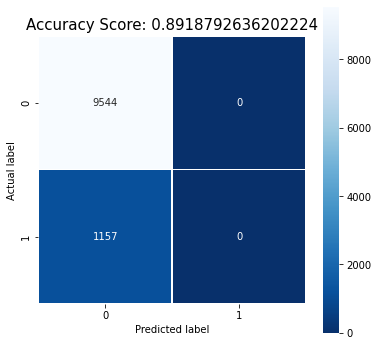

In [ ]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Now that we have done it for a small group, let's play with a PFAS chemical using more training data. First, let's look at overlap with the PFAS Group

In [20]:
#NAIMAN'S ORIGINAL CODE
# For each pair of data frames determine the number of entries in the intersection.
# wanted to know where i have files with multiple chemicals for one person
#
ndf=len(fnames)
M=np.zeros((ndf,ndf))
for i in range(ndf):
    for j in range(ndf):
        fnamei=fnames[i]
        fnamej=fnames[j]
        dfi=df[fnamei]
        dfj=df[fnamej]
        SEQNi=set(dfi.SEQN)
        SEQNj=set(dfj.SEQN)
        M[i,j]=len(SEQNi.intersection(SEQNj))
ndf

17

In [21]:
#NAIMAN'S ORIGINAL CODE
# make list of all SEQNs in all the datasets, find that there is 9422 people
#
ALLSEQN=set()
for i in range(ndf):
    SEQN=set(df[fnames[i]].SEQN.astype(int))
    ALLSEQN=ALLSEQN.union(SEQN)
print(len(ALLSEQN))
#
# for each SEQN count number of data frames in which it appears
#
ALLSEQN=list(ALLSEQN)
print(len(ALLSEQN))
#
# index for each sequence number
#
index_of_sequence_number={}
ctr=0
for seqn in ALLSEQN:
    index_of_sequence_number[seqn]=ctr
    ctr+=1

9422
9422


In [22]:
# make list of all SEQNs in PFAS group
PFAS_SEQN=[]
for i in df['PFAS_H']['SEQN']:
  PFAS_SEQN.append(i)
len(PFAS_SEQN)

2339

In [23]:
#counting how many people show up in PFAS and other groups
count=0
for i in ALLSEQN:
  if i in PFAS_SEQN:
    count +=1
count

2339

In [24]:
#seeing which chemical groups have the same people tested as in PFAS
shared_w_PFAS=[]
for i in fnames:
  SEQN = df[i]['SEQN']
  intersection_set = set.intersection(set(SEQN), set(PFAS_SEQN))
  intersection_list = list(intersection_set)
  if len(intersection_list) > 0:
      shared_w_PFAS.append(i)
len(shared_w_PFAS)

7

In [25]:
#removing PFAS itself form this list
shared_w_PFAS.remove('PFAS_H')
shared_w_PFAS

['VOCWB_H', 'PHTHTE_H', 'EPHPP_H', 'IHGEM_H', 'PBCD_H', 'FLDEP_H']

# master dataframe

In [26]:
#making one master dataframe of everything that will be used to model PFAS_H
df_predict=pd.DataFrame(data=df['PFAS_H'])
print(df_predict.shape[1])
for i in shared_w_PFAS:
  df_predict=pd.merge(df_predict,pd.DataFrame(data=df[i]),on='SEQN')
df_predict

18


,SEQN,WTSB2YR_x,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL,WTSVOC2Y,LBX2DF,LBD2DFLC,LBX4CE,LBD4CELC,LBXV06,LBDV06LC,LBXV07N,LBDV07LC,LBXV08N,LBDV08LC,LBXV1D,LBDV1DLC,LBXV2A,LBDV2ALC,LBXV3B,LBDV3BLC,LBXV4C,LBDV4CLC,LBXVBF,LBDVBFLC,LBXVBM,...,URDTRSLC,URXBUP,URDBUPLC,URXEPB,URDEPBLC,URXMPB,URDMPBLC,URXPPB,URDPPBLC,URX14D,URD14DLC,URXDCB,URDDCBLC,URXUCR_y,WTSH2YR_x,LBXIHG,LBDIHGSI,LBDIHGLC,LBXBGE,LBDBGELC,LBXBGM,LBDBGMLC,WTSH2YR_y,LBXBPB,LBDBPBSI,LBDBPBLC,LBXBCD,LBDBCDSI,LBDBCDLC,LBXTHG,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,LBDPFL,LBDPFLLC
0,73584.0,215257.726114,0.20,0.0,0.8,0.0,0.90,0.0,0.07,1.0,0.07,1.0,0.8,0.0,0.07,1.0,0.07,1.0,153051.358532,0.0078,1.0,0.0283,1.0,0.0863,1.0,0.0707,1.0,0.0707,1.0,0.0177,1.0,0.0071,1.0,0.0177,1.0,0.0339,1.0,0.0057,1.0,0.0042,...,0.0,0.10,0.0,0.71,1.0,54.4,0.0,1.3,0.0,0.3,0.0,0.4,0.0,106.0,153051.358532,0.19,0.95,1.0,0.11,1.0,0.35,0.0,153051.358532,0.63,0.030,0.0,0.07,0.62,1.0,0.20,1.0,1.0,184.58,2.34,0.0,13.90,252.98,0.0,0.36,0.0
1,73887.0,241296.578002,0.80,0.0,1.6,0.0,0.90,0.0,0.07,1.0,0.60,0.0,1.9,0.0,0.20,0.0,0.07,1.0,171565.359065,0.0078,1.0,0.0283,1.0,0.0863,1.0,0.0707,1.0,0.0707,1.0,0.0177,1.0,0.0071,1.0,0.0177,1.0,0.0339,1.0,0.0057,1.0,0.0042,...,0.0,0.07,1.0,0.71,1.0,20.2,0.0,1.3,0.0,0.9,0.0,0.7,0.0,164.0,171565.359065,0.19,0.95,1.0,0.11,1.0,0.60,0.0,171565.359065,1.61,0.078,0.0,0.12,1.07,0.0,0.80,4.0,0.0,277.66,3.53,0.0,14.19,258.26,0.0,0.66,0.0
2,73892.0,35730.540000,0.10,0.0,0.4,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.6,0.0,0.07,1.0,0.20,0.0,30214.642746,0.0078,1.0,0.0283,1.0,0.0863,1.0,0.0707,1.0,0.0707,1.0,0.0177,1.0,0.0071,1.0,0.0177,1.0,0.0339,1.0,0.0057,1.0,0.0042,...,0.0,0.07,1.0,27.40,0.0,165.9,0.0,26.3,0.0,0.4,0.0,0.5,0.0,207.0,30214.642746,0.19,0.95,1.0,0.11,1.0,1.14,0.0,30214.642746,0.60,0.029,0.0,0.23,2.05,0.0,1.25,6.2,0.0,201.48,2.56,0.0,10.93,198.93,0.0,0.32,0.0
3,73915.0,111695.294158,0.07,1.0,0.6,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0,80007.412799,0.0078,1.0,0.0283,1.0,0.0863,1.0,0.0707,1.0,0.0707,1.0,0.0177,1.0,0.0071,1.0,0.0177,1.0,0.0339,1.0,0.0057,1.0,0.0042,...,0.0,0.07,1.0,0.71,1.0,11.8,0.0,2.1,0.0,2.2,0.0,0.5,0.0,72.0,80007.412799,0.19,0.95,1.0,0.11,1.0,0.08,1.0,80007.412799,0.36,0.017,0.0,0.12,1.07,0.0,0.20,1.0,1.0,211.33,2.68,0.0,6.80,123.76,0.0,0.47,0.0
4,73920.0,74037.611424,0.20,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0,57332.733223,0.0078,1.0,0.0283,1.0,NaN,NaN,0.0707,1.0,NaN,NaN,0.0177,1.0,0.0071,1.0,0.0177,1.0,0.0339,1.0,0.0057,1.0,0.0042,...,0.0,0.07,1.0,0.71,1.0,4.0,0.0,1.8,0.0,2.1,0.0,0.9,0.0,161.0,57332.733223,0.19,0.95,1.0,0.11,1.0,0.20,0.0,57332.733223,0.74,0.036,0.0,0.07,0.62,1.0,0.20,1.0,1.0,191.19,2.43,0.0,15.21,276.82,0.0,0.55,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,83036.0,43410.687007,0.10,0.0,0.8,0.0,0.70,0.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0,25063.195436,0.0078,1.0,0.0283,1.0,0.0863,1.0,0.0707,1.0,0.0707,1.0,0.0177,1.0,0.0071,1.0,0.0177,1.0,NaN,NaN,0.0057,1.0,0.0042,...,1.0,0.80,0.0,17.90,0.0,1832.7,0.0,207.2,0.0,1.6,0.0,0.6,0.0,296.0,25063.195436,0.19,0.95,1.0,0.11,1.0,0.17,0.0,25063.195436,1.13,0.055,0.0,0.22,1.96,0.0,0.46,2.3,0.0,190.46,2.42,0.0,12.23,222.59,0.0,0.33,0.0
112,83039.0,53246.643976,0.07,1.0,0.4,0.0,0.30,0.0,0.07,1.0,0.10,0.0,0.3,0.0,0.07,1.0,0.07,1.0,37859.134466,0.0078,1.0,0.0283,1.0,0.0863,1.0,0.0707,1.0,0.0707,1.0,0.0177,1.0,0.0071,1.0,0.0177,1.0,0.0339,1.0,0.0057,1.0,0.0042,...,0.0,0.07,1.0,1.10,0.0,29.7,0.0,2.0,0.0,1.1,0.0,1.0,0.0,324.0,37859.134466,0.19,0.95,1.0,0.11,1.0,0.08,1.0,37859.134466,0.25,0.012,0.0,0.07,0.62,1.0,0.20,1.0,1.0,207.34,2.63,0.0,10.51,191.28,

In [27]:
#checking that everything made it into the dataframe
count= 18
for i in shared_w_PFAS:
  j = pd.DataFrame(data=df[i])
  m = j.shape[1]-1
  count += m
count

177

# Imputation

In [28]:
# imputation 
# detect percentages dictionary : d_p 
import math
import random
for col in df_predict.columns:
  for row in range(0,len(df_predict)):

    # replace Nan vals with 0 or 1 based on detect percentages in d_p
    if math.isnan(df_predict[col].values[row]) and col in d_p.keys():
      df_predict[col].values[row] = random.choices([0,1], weights = (d_p.get(col), 100.00-d_p.get(col)), k=1)[0]

    # had an error with a column - this is code to fix the error 
    # if column is Nan but not in d_p (not sure how/why this would be the case), replace Nan with random 0 or 1 value
    elif math.isnan(df_predict[col].values[row]):
      df_predict[col].values[row] = round(random.random())

In [29]:
df_predict

,SEQN,WTSB2YR_x,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL,WTSVOC2Y,LBX2DF,LBD2DFLC,LBX4CE,LBD4CELC,LBXV06,LBDV06LC,LBXV07N,LBDV07LC,LBXV08N,LBDV08LC,LBXV1D,LBDV1DLC,LBXV2A,LBDV2ALC,LBXV3B,LBDV3BLC,LBXV4C,LBDV4CLC,LBXVBF,LBDVBFLC,LBXVBM,...,URDTRSLC,URXBUP,URDBUPLC,URXEPB,URDEPBLC,URXMPB,URDMPBLC,URXPPB,URDPPBLC,URX14D,URD14DLC,URXDCB,URDDCBLC,URXUCR_y,WTSH2YR_x,LBXIHG,LBDIHGSI,LBDIHGLC,LBXBGE,LBDBGELC,LBXBGM,LBDBGMLC,WTSH2YR_y,LBXBPB,LBDBPBSI,LBDBPBLC,LBXBCD,LBDBCDSI,LBDBCDLC,LBXTHG,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,LBDPFL,LBDPFLLC
0,73584.0,215257.726114,0.20,0.0,0.8,0.0,0.90,0.0,0.07,1.0,0.07,1.0,0.8,0.0,0.07,1.0,0.07,1.0,153051.358532,0.0078,1.0,0.0283,1.0,0.0863,1.0,0.0707,1.0,0.0707,1.0,0.0177,1.0,0.0071,1.0,0.0177,1.0,0.0339,1.0,0.0057,1.0,0.0042,...,0.0,0.10,0.0,0.71,1.0,54.4,0.0,1.3,0.0,0.3,0.0,0.4,0.0,106.0,153051.358532,0.19,0.95,1.0,0.11,1.0,0.35,0.0,153051.358532,0.63,0.030,0.0,0.07,0.62,1.0,0.20,1.0,1.0,184.58,2.34,0.0,13.90,252.98,0.0,0.36,0.0
1,73887.0,241296.578002,0.80,0.0,1.6,0.0,0.90,0.0,0.07,1.0,0.60,0.0,1.9,0.0,0.20,0.0,0.07,1.0,171565.359065,0.0078,1.0,0.0283,1.0,0.0863,1.0,0.0707,1.0,0.0707,1.0,0.0177,1.0,0.0071,1.0,0.0177,1.0,0.0339,1.0,0.0057,1.0,0.0042,...,0.0,0.07,1.0,0.71,1.0,20.2,0.0,1.3,0.0,0.9,0.0,0.7,0.0,164.0,171565.359065,0.19,0.95,1.0,0.11,1.0,0.60,0.0,171565.359065,1.61,0.078,0.0,0.12,1.07,0.0,0.80,4.0,0.0,277.66,3.53,0.0,14.19,258.26,0.0,0.66,0.0
2,73892.0,35730.540000,0.10,0.0,0.4,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.6,0.0,0.07,1.0,0.20,0.0,30214.642746,0.0078,1.0,0.0283,1.0,0.0863,1.0,0.0707,1.0,0.0707,1.0,0.0177,1.0,0.0071,1.0,0.0177,1.0,0.0339,1.0,0.0057,1.0,0.0042,...,0.0,0.07,1.0,27.40,0.0,165.9,0.0,26.3,0.0,0.4,0.0,0.5,0.0,207.0,30214.642746,0.19,0.95,1.0,0.11,1.0,1.14,0.0,30214.642746,0.60,0.029,0.0,0.23,2.05,0.0,1.25,6.2,0.0,201.48,2.56,0.0,10.93,198.93,0.0,0.32,0.0
3,73915.0,111695.294158,0.07,1.0,0.6,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0,80007.412799,0.0078,1.0,0.0283,1.0,0.0863,1.0,0.0707,1.0,0.0707,1.0,0.0177,1.0,0.0071,1.0,0.0177,1.0,0.0339,1.0,0.0057,1.0,0.0042,...,0.0,0.07,1.0,0.71,1.0,11.8,0.0,2.1,0.0,2.2,0.0,0.5,0.0,72.0,80007.412799,0.19,0.95,1.0,0.11,1.0,0.08,1.0,80007.412799,0.36,0.017,0.0,0.12,1.07,0.0,0.20,1.0,1.0,211.33,2.68,0.0,6.80,123.76,0.0,0.47,0.0
4,73920.0,74037.611424,0.20,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0,57332.733223,0.0078,1.0,0.0283,1.0,0.0000,1.0,0.0707,1.0,0.0000,1.0,0.0177,1.0,0.0071,1.0,0.0177,1.0,0.0339,1.0,0.0057,1.0,0.0042,...,0.0,0.07,1.0,0.71,1.0,4.0,0.0,1.8,0.0,2.1,0.0,0.9,0.0,161.0,57332.733223,0.19,0.95,1.0,0.11,1.0,0.20,0.0,57332.733223,0.74,0.036,0.0,0.07,0.62,1.0,0.20,1.0,1.0,191.19,2.43,0.0,15.21,276.82,0.0,0.55,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,83036.0,43410.687007,0.10,0.0,0.8,0.0,0.70,0.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0,25063.195436,0.0078,1.0,0.0283,1.0,0.0863,1.0,0.0707,1.0,0.0707,1.0,0.0177,1.0,0.0071,1.0,0.0177,1.0,0.0000,1.0,0.0057,1.0,0.0042,...,1.0,0.80,0.0,17.90,0.0,1832.7,0.0,207.2,0.0,1.6,0.0,0.6,0.0,296.0,25063.195436,0.19,0.95,1.0,0.11,1.0,0.17,0.0,25063.195436,1.13,0.055,0.0,0.22,1.96,0.0,0.46,2.3,0.0,190.46,2.42,0.0,12.23,222.59,0.0,0.33,0.0
112,83039.0,53246.643976,0.07,1.0,0.4,0.0,0.30,0.0,0.07,1.0,0.10,0.0,0.3,0.0,0.07,1.0,0.07,1.0,37859.134466,0.0078,1.0,0.0283,1.0,0.0863,1.0,0.0707,1.0,0.0707,1.0,0.0177,1.0,0.0071,1.0,0.0177,1.0,0.0339,1.0,0.0057,1.0,0.0042,...,0.0,0.07,1.0,1.10,0.0,29.7,0.0,2.0,0.0,1.1,0.0,1.0,0.0,324.0,37859.134466,0.19,0.95,1.0,0.11,1.0,0.08,1.0,37859.134466,0.25,0.012,0.0,0.07,0.62,1.0,0.20,1.0,1.0,207.34,2.63,0.0,10.5

# Let's run logistic Regression to predict one of the detection levels for a PFAS chemical

# Had issues with the way I would usually go about stepwise regression (don't run these cells)
# let's just move on for now with another strategy

In [ ]:
#has to be linearly independent
import sympy
reduced_form, inds = sympy.Matrix(df_predict.values).rref()


(0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 57,
 59,
 61,
 63,
 64,
 65,
 67,
 68,
 69,
 71,
 73,
 74,
 75,
 76,
 77,
 79,
 80,
 81,
 83,
 85,
 87,
 88,
 89,
 90,
 91,
 93,
 95,
 96,
 98,
 99,
 101,
 103,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 119,
 120,
 121,
 123,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140)

In [ ]:
for i in range(len(df_predict)):
  if i not in inds:
    df_predict=df_predict.drop(columns=df_predict.iloc[:,i].name)


In [ ]:
train, test = train_test_split(df_predict, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']

In [ ]:
#has to be linearly independent
import sympy
reduced_form, inds = sympy.Matrix(X_train.values).rref()

In [ ]:
for i in range(len(X_train)):
  if i not in inds:
    X_train=X_train.drop(columns=X_train.iloc[:,i].name)

In [ ]:
import pandas as pd
import statsmodels.api as sm
log_reg=sm.Logit(Y_train,X_train).fit()

LinAlgError: ignored

In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:               LBDPFDEL   No. Observations:                   92
Model:                          Logit   Df Residuals:                       91
Method:                           MLE   Df Model:                            0
Date:                Fri, 25 Feb 2022   Pseudo R-squ.:                 0.01077
Time:                        22:59:21   Log-Likelihood:                -60.455
converged:                       True   LL-Null:                       -61.113
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBD2DFLC      -0.5596      0.222     -2.525      0.012      -0.994      -0.125


#Splitting the data

In [30]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_predict, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']
Y_test=test['LBDPFDEL']

# looking at p-values

In [31]:
from scipy import stats
p_values={}
for col in X_train.columns:
  name=str(col)
  oddsratio, pvalue = stats.ttest_ind(X_train[col],Y_train)
  #print("the P-value for ",col," is ",pvalue)
  p_values[name]=pvalue
#p_values

In [32]:
#only entertaining those with pvalues <0.05
p_values_sig={}
for i in p_values:
  if p_values[i]<0.05:
    p_values_sig[i]= p_values[i]
len(p_values_sig)

152

In [33]:
#sorting the p values from smallest to largest
sorted_p_values_sig=dict(sorted(p_values_sig.items(),key=lambda item: item[1],reverse=True))
sorted_p_values_sig

{'LBD2DFLC': 8.706905959893554e-22,
 'LBD4CELC': 7.397003765338741e-30,
 'LBDBCDSI': 2.3981857887689113e-05,
 'LBDBGELC': 7.397003765338741e-30,
 'LBDBMNLC': 2.6479062156971743e-09,
 'LBDBMNSI': 2.03638350886545e-53,
 'LBDBPBLC': 3.582855754157621e-10,
 'LBDBPBSI': 3.1431297559799693e-06,
 'LBDBSELC': 2.6479062156971743e-09,
 'LBDBSESI': 1.0176572761601994e-59,
 'LBDIHGLC': 1.015342594122289e-20,
 'LBDIHGSI': 5.923663050829842e-10,
 'LBDMPAHL': 0.016478900021349913,
 'LBDPFBSL': 6.405066987409158e-23,
 'LBDPFDOL': 4.099025251415018e-12,
 'LBDPFHPL': 1.847233537445175e-10,
 'LBDPFHSL': 1.4822442143018402e-06,
 'LBDPFLLC': 0.017038836409890255,
 'LBDPFNAL': 3.7681661055227564e-07,
 'LBDPFUAL': 5.202168904866069e-09,
 'LBDTHGSI': 5.930827709556774e-17,
 'LBDV06LC': 2.0536650096168508e-25,
 'LBDV07LC': 8.617980156430375e-27,
 'LBDV08LC': 7.397003765338741e-30,
 'LBDV1DLC': 7.397003765338741e-30,
 'LBDV2ALC': 2.8726461995606443e-28,
 'LBDV3BLC': 7.397003765338741e-30,
 'LBDV4CLC': 8.7069059

#need help on this broken while loop (don't run)

In [ ]:
#compute log lik instead (should always increase) 
scores={}
include=list(sorted_p_values_sig.keys())
used=[]
score =0
new_score=0
while len(used)<10:
  while score<=new_score:
    for i in range(len(include)):
      used.append(include[i])
      model=LogisticRegression(max_iter=10000)
      model.fit(X_train[used],Y_train)
      prediction= model.predict(X_test[used])
      new_score = model.score(X_test[used],Y_test)
      if new_score>score:
        score=new_score

KeyboardInterrupt: ignored

# Feature Selection

1.0.2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0  has score of  0.0038655028995148518
1  has score of  -1.823398259992193e-05
2  has score of  -5.2826719780598e-06
3  has score of  -0.0011144519447927712
4  has score of  -2.2246314376196228e-05
5  has score of  8.788829242134877e-06
6  has score of  3.515899219071554e-05
7  has score of  2.030920500069397e-05
8  has score of  -0.0005801102878401708
9  has score of  -8.719880389155128e-05
10  has score of  3.4456359381440395e-05
11  has score of  -5.1711984921684196e-06
12  has score of  -2.977404964560115e-06
13  has score of  -0.0005008482032211288
14  has score of  1.1009551419755798e-05
15  has score of  -3.805549463111258e-05
16  has score of  1.1874333517624984e-05
17  has score of  -7.196035295157583e-05
18  has score of  5.428084313529306e-06
19  has score of  8.783783556215311e-07
20  has score of  5.700805163526577e-06
21  has score of  -9.82857134192173e-06
22  has score of  6.139395124084404e-06
23  has score of  -2.2341821272976236e-05
24  has score of  7.52500765040699

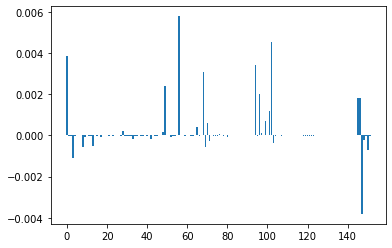

In [34]:
import sklearn
print(sklearn.__version__)
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
model=LogisticRegression()
model.fit(X_train[sorted_p_values_sig.keys()],Y_train)
importance=model.coef_[0]
for i,j in enumerate(importance):
  print(i," has score of ",j)
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

1.0.2
108  has score of  1.0429266379697856e-05
109  has score of  2.029331113260901e-05
110  has score of  -2.8640308805858057e-06
111  has score of  -3.6415663176270205e-06
112  has score of  -3.6415663176270205e-06
113  has score of  -3.6415663176270205e-06
114  has score of  3.100341746824998e-06
115  has score of  2.636682678357443e-06
116  has score of  2.636682678357443e-06
117  has score of  2.636682678357443e-06
118  has score of  -9.238826235687307e-06
119  has score of  -1.2125658489026291e-05
120  has score of  -1.0038964540521708e-05
121  has score of  -4.936268149092137e-06
122  has score of  -4.009830172098561e-06
123  has score of  -8.358356241684262e-06
124  has score of  3.0775857707566285e-06
125  has score of  3.4437734589903637e-06
126  has score of  3.4340980132052752e-06
127  has score of  -3.1589420519210724e-07
128  has score of  -3.1589420519210724e-07
129  has score of  -3.1589420519210724e-07
130  has score of  -3.1589420519210724e-07
131  has score of  -3.1

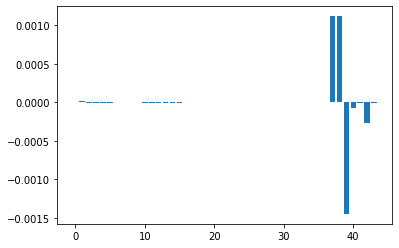

In [35]:
#we have to do it again for the ones that maxed out
import sklearn
print(sklearn.__version__)
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
model=LogisticRegression()
model.fit(X_train[list(sorted_p_values_sig.keys())[108:]],Y_train)
importance=model.coef_[0]
for i,j in enumerate(importance):
  print(i+108," has score of ",j)
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [36]:
#results
#i would consider 10 to be important
L2= list(X_test.columns)
important=[101,39,99,3,98,104,49,90,92,30]
#I would consider 29 features to be somewhat supportive and creating a list of them from lowesr to highest
L3=[57,80,45,79,10,100,94,96,65,68,34,11,108,117,58,78,110,70,115,35,111,7,106,107,44,53,124,8,50]
L4=[]
for i in L3:
  L4.append(L2[i])
L5=[]
for i in important:
  L5.append(L2[i])

# doing stepwise regression by hand so we can at least have it done

In [ ]:
#model_change={}
#include=list(sorted_p_values_sig.keys())
#i=0
#while i<27:
#  model=LogisticRegression()
#  model.fit(X_train[L4[i]],Y_train)
#  prediction= model.predict(X_test[L4[i]])
#  score = model.score(X_test[L4[i]],Y_test)
#  print(score)
#  model_change[L4[i]]=score
#  i+=1


In [ ]:
#run to restart
used=[]
model_change={}

In [ ]:
i= 0 #enter number you want to add (based on how it was rated in importance)
include=list(sorted_p_values_sig.keys())
used.append(L5[i])
model=LogisticRegression()
model.fit(X_train[used],Y_train)
prediction= model.predict(X_test[used])
score = model.score(X_test[used],Y_test)
print(score)
model_change[L5[i]]=score
model_change

0.7916666666666666


{'LBDPFHSL': 0.7916666666666666,
 'LBDV2ALC': 0.7916666666666666,
 'LBDVTCLC': 0.7916666666666666,
 'LBDVTPLC': 0.7916666666666666,
 'LBDVVBLC': 0.7916666666666666,
 'LBXVCF': 0.7916666666666666,
 'LBXVDX': 0.7916666666666666,
 'URDCNPLC': 0.7916666666666666,
 'URDMBPLC': 0.7916666666666666,
 'URXECP': 0.75}

Couldn't get over 0.79166... accuracy, but it did start getting worse, even after backwards step removing some (i.e. important: 1,2,6; supportive: 3,4) 

In [ ]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[14  0]
 [ 5  5]]


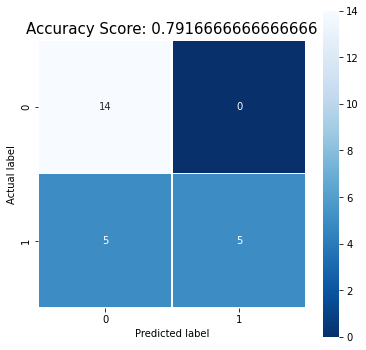

In [ ]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
df_predict.columns

Index(['SEQN', 'WTSB2YR_x', 'LBXPFDE', 'LBDPFDEL', 'LBXPFHS', 'LBDPFHSL',
       'LBXMPAH', 'LBDMPAHL', 'LBXPFBS', 'LBDPFBSL',
       ...
       'LBDTHGSI', 'LBDTHGLC', 'LBXBSE', 'LBDBSESI', 'LBDBSELC', 'LBXBMN',
       'LBDBMNSI', 'LBDBMNLC', 'LBDPFL', 'LBDPFLLC'],
      dtype='object', length=177)

In [ ]:
# stepwise regression using statsmodels.api 
# method mostly from : https://towardsdatascience.com/stepwise-regression-tutorial-in-python-ebf7c782c922

import statsmodels.api as sm
# y predictor, x other cols 


'''
get_stats : takes as imput data frame of columns from df_predict
outputs Ordinary Least Squares 
want columns yielding p value (P > |t|) < 0.05
'''
def get_stats(x):
    if 'LBDPFDEL' in x.columns:
      x.drop('LBDPFDEL')
    if 'LBXPFDE' in x.columns:
      x.drop('LBXPFDE')
    y = df_predict['LBDPFDEL']
    results = sm.OLS(y, x).fit()
    print(results.summary())

x = df_predict


# Let Try a different feature selection (this resulted in errors; don't run)

0  has score of  0.01494079978750858
1  has score of  0.0
2  has score of  0.0
3  has score of  0.0
4  has score of  0.0
5  has score of  0.0
6  has score of  0.0
7  has score of  0.0
8  has score of  0.0
9  has score of  0.0
10  has score of  0.0029472592173426498
11  has score of  0.0
12  has score of  0.07341109595861252
13  has score of  0.0
14  has score of  0.0
15  has score of  0.0
16  has score of  0.0016600888652787294
17  has score of  0.0
18  has score of  0.0
19  has score of  0.0
20  has score of  0.0
21  has score of  0.0
22  has score of  0.0
23  has score of  0.0
24  has score of  0.0
25  has score of  0.002821843931498363
26  has score of  0.0
27  has score of  0.0
28  has score of  0.0
29  has score of  0.0
30  has score of  0.0
31  has score of  0.0
32  has score of  0.0
33  has score of  0.0
34  has score of  0.0
35  has score of  0.47588875933550806
36  has score of  0.0
37  has score of  0.0
38  has score of  0.0
39  has score of  0.0
40  has score of  0.0
41  has

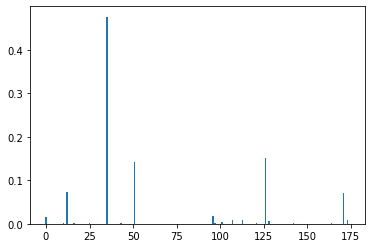

In [37]:
#switching to
Y_train=train['LBXPFDE']
Y_test=test['LBXPFDE']

#let's try decision tree regressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
importance = model.feature_importances_
for i,j in enumerate(importance):
	print(i," has score of ",j)
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [38]:
#results
#i would consider 25 to be important
L7=[171,0,124,107,165,12,173,10,22,155,146,135,14,96,62,126,163,37,63,148,101,47,93,85,142]

#run to restart
used=[]
model_change={}


In [41]:
X_train.iloc[:,L7[0]]

105    211.85
27     259.17
47     308.49
34     215.85
83     219.86
        ...  
23     371.28
86     125.40
4      276.82
97     113.20
79     194.19
Name: LBDBMNSI, Length: 92, dtype: float64

In [ ]:
Y_train=train['LBXPFDE']
Y_test=test['LBXPFDE']

In [ ]:
i= 0 #enter number you want to add (based on how it was rated in importance)
from sklearn.tree import DecisionTreeRegressor
include=list(sorted_p_values_sig.keys())
used.append(L7[i])
model=DecisionTreeRegressor()
model.fit(X_train[used],Y_train)
prediction= model.predict(X_test[used])
score = model.score(X_test[used],Y_test)
print(score)
model_change[L7[i]]=score
model_change

KeyError: ignored

In [ ]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

NameError: ignored

In [ ]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

NameError: ignored

<Figure size 432x432 with 0 Axes>

#which of the chemicals do we have that we will treat as binary in our model?

In [ ]:
intersection_set = set.intersection(set(df_predict.columns), set(binary_df.columns))
intersection_list = list(intersection_set)
#removing this one because it is one of very very few chemicals that don't follow the naming convention
intersection_list.remove('URXTLC')

In [ ]:
intersection_list

['URD14DLC',
 'LBDVCTLC',
 'URDMC1LC',
 'URDBPFLC',
 'LBDVMCLC',
 'LBDVMELC',
 'LBDVTELC',
 'LBDBMNLC',
 'LBDVMPLC',
 'URDMZPLC',
 'URDPPBLC',
 'URDDCBLC',
 'LBDVIPLC',
 'LBDVFNLC',
 'URDBPSLC',
 'LBDVVBLC',
 'LBDVHTLC',
 'LBDBSELC',
 'LBDBPBLC',
 'LBDVEBLC',
 'URDMIBLC',
 'LBDVDXLC',
 'URDMBPLC',
 'URDTLCLC',
 'LBDV3BLC',
 'URDBPHLC',
 'URDECPLC',
 'URDCOPLC',
 'URDTRSLC',
 'LBDVECLC',
 'LBDVDBLC',
 'URDMHHLC',
 'URDCNPLC',
 'LBD4CELC',
 'LBDVBFLC',
 'LBDVXYLC',
 'LBDVCBLC',
 'LBDVTOLC',
 'LBDTHGLC',
 'LBDBGMLC',
 'LBDIHGLC',
 'LBDVOXLC',
 'LBDV06LC',
 'URDMOHLC',
 'LBD2DFLC',
 'LBDVDELC',
 'URDMNPLC',
 'LBDVEALC',
 'LBDPFLLC',
 'LBDBCDLC',
 'LBDVCFLC',
 'URDMHPLC',
 'URDMEPLC',
 'LBDV08LC',
 'LBDBGELC',
 'LBDV07LC',
 'LBDVBMLC',
 'LBDVNBLC',
 'URDBP3LC',
 'URDMPBLC',
 'LBDVBZLC',
 'URDEPBLC',
 'LBDV2ALC',
 'LBDVCMLC',
 'LBDVTPLC',
 'URDMCHLC',
 'LBDVEELC',
 'URDBUPLC',
 'LBDVTCLC',
 'LBDVC6LC',
 'LBDVFTLC',
 'LBDV1DLC',
 'LBDV4CLC']

In [ ]:
len(intersection_list)/len(df_predict)*100

62.93103448275862

In [ ]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [ ]:
#created this with the intention of removing the levels and only keeping the detect or not LC comment code since they will be treated as binary
cols_to_drop

['URX14D',
 'LBXVCT',
 'URXMC1',
 'URXBPF',
 'LBXVMC',
 'LBXVME',
 'LBXVTE',
 'LBXBMN',
 'LBXVMP',
 'URXMZP',
 'URXPPB',
 'URXDCB',
 'LBXVIP',
 'LBXVFN',
 'URXBPS',
 'LBXVVB',
 'LBXVHT',
 'LBXBSE',
 'LBXBPB',
 'LBXVEB',
 'URXMIB',
 'LBXVDX',
 'URXMBP',
 'URXTLC',
 'LBXV3B',
 'URXBPH',
 'URXECP',
 'URXCOP',
 'URXTRS',
 'LBXVEC',
 'LBXVDB',
 'URXMHH',
 'URXCNP',
 'LBX4CE',
 'LBXVBF',
 'LBXVXY',
 'LBXVCB',
 'LBXVTO',
 'LBXTHG',
 'LBXBGM',
 'LBXIHG',
 'LBXVOX',
 'LBXV06',
 'URXMOH',
 'LBX2DF',
 'LBXVDE',
 'URXMNP',
 'LBXVEA',
 'LBXPFL',
 'LBXBCD',
 'LBXVCF',
 'URXMHP',
 'URXMEP',
 'LBXV08',
 'LBXBGE',
 'LBXV07',
 'LBXVBM',
 'LBXVNB',
 'URXBP3',
 'URXMPB',
 'LBXVBZ',
 'URXEPB',
 'LBXV2A',
 'LBXVCM',
 'LBXVTP',
 'URXMCH',
 'LBXVEE',
 'URXBUP',
 'LBXVTC',
 'LBXVC6',
 'LBXVFT',
 'LBXV1D',
 'LBXV4C']